In [8]:
import os
import sys
import json
import pandas as pd
import numpy as np
import mwparserfromhell as mw
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

%load_ext autoreload
%autoreload 2
import processing # this makes the "processing" folder available as a python module

from features.combatants import get_combatant, get_combatants
from utils import remove_ref, get_templates

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
battles = json.load(open("../datasets/battle-fields-0.json"))
battles_ib = [b["infobox"] for b in battles if not b["infobox"].get("error")]
comb_parsed = [get_combatants(b) for b in battles if not b["infobox"].get("error")]
comb = [{"combatant_%s_source" % n: b.get("combatant%s"%n)  for n in range(1,4)} for b in battles_ib]
for cp, c in zip(comb_parsed, comb):
    cp.update(c)

In [4]:
print("tot", len(comb_parsed))
df = pd.DataFrame(comb_parsed).fillna(np.nan)
df.isna().sum()

tot 7486


combatant_1             11
combatant_1_source      11
combatant_2             13
combatant_2_source      13
combatant_3           7105
combatant_3_source    7103
dtype: int64

In [5]:
df[df["combatant_1"].isna()]

,combatant_1,combatant_1_source,combatant_2,combatant_2_source,combatant_3,combatant_3_source
3561,NaN,NaN,NaN,NaN,NaN,NaN
3736,NaN,NaN,NaN,NaN,NaN,NaN
3768,NaN,NaN,NaN,NaN,NaN,NaN
4986,NaN,NaN,NaN,NaN,NaN,NaN
5276,NaN,NaN,NaN,NaN,NaN,NaN
5506,NaN,NaN,NaN,NaN,NaN,NaN
6205,NaN,NaN,NaN,NaN,NaN,NaN
6254,NaN,NaN,NaN,NaN,NaN,NaN
6425,NaN,NaN,NaN,NaN,NaN,NaN
6943,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(mw.parse("{{flagicon|Bad Guy inc}}[[Bad Guy|Bad Guy Verbose]] supported by [[OK Guy|OK-ish Guy Verbose]] (BG)<ref name=\"stamfordhistory.org\">[http://www.stamfordhistory.org/ww2_peleliu.htm The Stamford Historical Society: Peleliu] Retrieved 27 Oct. 2015</ref><br>").strip_code())
get_combatant("{{flagicon|Bad Guy inc}}[[Bad Guy|Bad Guy Verbose]] supported by [[OK Guy|OK-ish Guy Verbose]] (BG)<ref name=\"stamfordhistory.org\">[http://www.stamfordhistory.org/ww2_peleliu.htm The Stamford Historical Society: Peleliu] Retrieved 27 Oct. 2015</ref><br>")

7475 7473 381
4719


United States                                  1197
France                                          721
Spain                                           530
United Kingdom                                  497
Kingdom of France                               434
Ottoman Empire                                  392
USA                                             390
Kingdom of Great Britain                        382
CSA                                             373
Union                                           359
CSA (Confederacy)                               313
Nazi Germany                                    285
German Empire                                   244
Empire of Japan                                 233
Russian Empire                                  227
Holy Roman Empire                               211
Australia                                       194
Kingdom of England                              181
British Empire                                  170
Sweden      

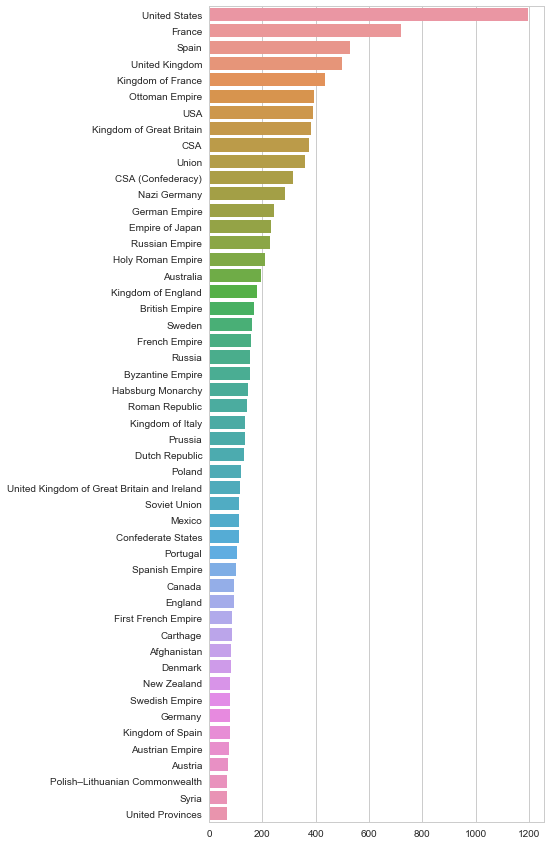

In [6]:
cbt_1 = np.array(df["combatant_1"].dropna())
cbt_2 = np.array(df["combatant_2"].dropna())
cbt_3 = np.array(df["combatant_3"].dropna())
print(len(cbt_1), len(cbt_2), len(cbt_3))

cbt_all = np.concatenate((cbt_1, cbt_2, cbt_3))

all_cbt_names = [c for cl in cbt_all for c in cl]
names = pd.Series(all_cbt_names)
print(len(set(all_cbt_names)))

f, ax = plt.subplots(figsize=(6, 15))
counts = names.value_counts().sort_values(ascending=False)
counts = counts.head(50)
sns.barplot(x=counts, y=counts.index, ax=ax)
counts